- ¿Se logró una exactitud mayor que con aprendizaje bayesiano?
- ¿Cuál es la profundidad óptima del árbol?
- ¿Cuánta diferencia en la exactitud del resultado existe con los métodos de ganancia y gini?

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
import numpy as np
from io import StringIO
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder


In [2]:
globos = pd.read_csv("globos.csv", header=None)
globos.rename(columns = {0:'Color', 1:'Size', 2:'Prof', 3:'Age', 4:'Status'}, inplace = True)
class_names = list(np.unique(globos.values[:,4]))
print(class_names)
globos

['F', 'T']


,Color,Size,Prof,Age,Status
0,YELLOW,SMALL,STRETCH,ADULT,T
1,YELLOW,SMALL,STRETCH,CHILD,T
2,YELLOW,SMALL,DIP,ADULT,T
3,YELLOW,SMALL,DIP,CHILD,F
4,YELLOW,SMALL,DIP,CHILD,F
5,YELLOW,LARGE,STRETCH,ADULT,T
6,YELLOW,LARGE,STRETCH,CHILD,T
7,YELLOW,LARGE,DIP,ADULT,T
8,YELLOW,LARGE,DIP,CHILD,F
9,YELLOW,LARGE,DIP,CHILD,F


In [3]:
le = preprocessing.LabelEncoder()
globos = globos.apply(le.fit_transform)
globos

,Color,Size,Prof,Age,Status
0,1,1,1,0,1
1,1,1,1,1,1
2,1,1,0,0,1
3,1,1,0,1,0
4,1,1,0,1,0
5,1,0,1,0,1
6,1,0,1,1,1
7,1,0,0,0,1
8,1,0,0,1,0
9,1,0,0,1,0


In [4]:
data = globos.values[:,:4]
data_columns = list(globos.columns.values[:4])

In [5]:
target=globos.values[:,4]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=1)

In [7]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=2)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

Accuracy: 1.0


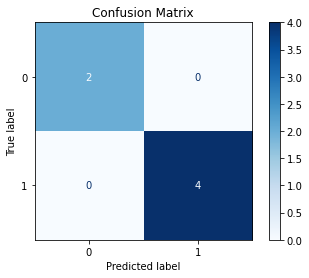

In [8]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
disp = metrics.plot_confusion_matrix(clf, X_test, y_test,cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix')
plt.show()

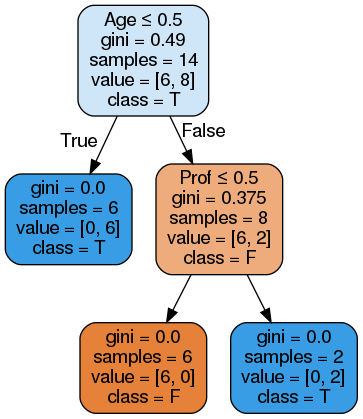

In [9]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = data_columns,class_names=class_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('iris.png')
Image(graph.create_png())